## Nipun Mohindra, D20019
## TF Assignment

## SES

In [ ]:
#import relevant libraries
import numpy as np
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error 
from math import sqrt 


In [4]:
#read the dataset
data=pd.read_csv(r'D:\Stu\PGP Data Science\Term 2\TF\seriesdat.csv')

In [5]:
data

,t,y
0,1,3
1,2,5
2,3,9
3,4,20
4,5,12
5,6,17
6,7,22
7,8,23
8,9,51
9,10,41


In [6]:
# split as train the first 10 entries and rest as test
train = data.iloc[0:10]
test = data.iloc[10:]
y_hat = test.copy()


In [7]:
# fit a SES without specifying smooth parameter, so library does it for us
fitx = SimpleExpSmoothing(np.asarray(train['y'])).fit(optimized=True)
print('optimal alpha chosen:', fitx.model.params['smoothing_level'])


C:\Users\Nipun\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


optimal alpha chosen: 0.7893451404406692


In [8]:
# fit a SES with explicitly supplied smooth parameter
fit2 = SimpleExpSmoothing(np.asarray(train['y'])).fit(smoothing_level=0.4, optimized=False)

In [9]:
fit2

In [10]:
# print the rmse of training step
rms_train_opt = sqrt(mean_squared_error(train['y'], fitx.fittedvalues)) 
print('rmse for fitted values with optimal alpha: ', rms_train_opt)
rms_train = sqrt(mean_squared_error(train['y'], fit2.fittedvalues)) 
print('rmse for fitted values with supplied alpha: ', rms_train)

rmse for fitted values with optimal alpha:  10.370473454369481
rmse for fitted values with supplied alpha:  11.97758663406276


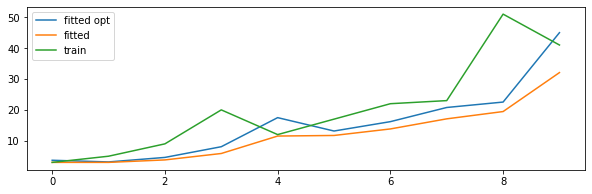

In [11]:
# plot training data against fitted values using both models
plt.figure(figsize=(10,3))
plt.plot(fitx.fittedvalues, label = 'fitted opt')
plt.plot(fit2.fittedvalues, label = 'fitted')
plt.plot(train['y'], label='train')
plt.legend(loc='best')
plt.show()

In [12]:
# forecast using both models
y_hat['SES_opt_fcast'] = fitx.forecast(len(y_hat))
y_hat['SES_fcast'] = fit2.forecast(len(y_hat))


In [13]:
# display forecasted values
y_hat

,t,y,SES_opt_fcast,SES_fcast
10,11,56,41.843247,35.645178
11,12,75,41.843247,35.645178
12,13,60,41.843247,35.645178
13,14,75,41.843247,35.645178
14,15,88,41.843247,35.645178


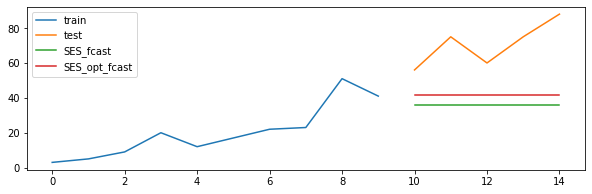

In [14]:

# plot the time series as train, test and forecasted
plt.figure(figsize=(10,3))
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.plot(y_hat['SES_fcast'], label='SES_fcast')
plt.plot(y_hat['SES_opt_fcast'], label='SES_opt_fcast')
plt.legend(loc='best')
plt.show()

In [15]:
# calculate RMSE of the forecast on test data
rms = sqrt(mean_squared_error(test.y, y_hat.SES_fcast)) 
print('rmse for model with supplied alpha: ', rms)
rms_opt = sqrt(mean_squared_error(test.y, y_hat.SES_opt_fcast)) 
print('rmse for model with optimal alpha: ', rms_opt)

rmse for model with supplied alpha:  37.00299290567906
rmse for model with optimal alpha:  31.174565582995854


## TES

In [16]:
#read and call the data
new=pd.read_csv(r'D:\Stu\PGP Data Science\Term 2\TF\seriesseasonal.csv')
new

,qtr,t,y
0,10 Q1,1,10
1,10 Q2,2,14
2,10 Q3,3,8
3,10 Q4,4,25
4,11 Q1,5,16
5,11 Q2,6,22
6,11 Q3,7,14
7,11 Q4,8,35
8,12 Q1,9,15
9,12 Q2,10,27


In [17]:
train = new.iloc[0:10]
test = new.iloc[10:]
y_hat = test.copy()


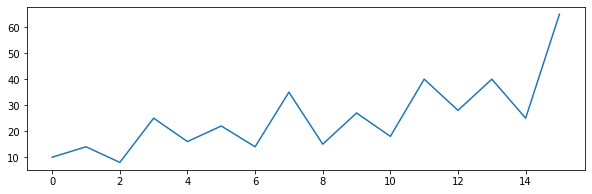

In [20]:
#plot the full data
plt.figure(figsize=(10,3))
plt.plot(new['y'], label='new')
plt.show()

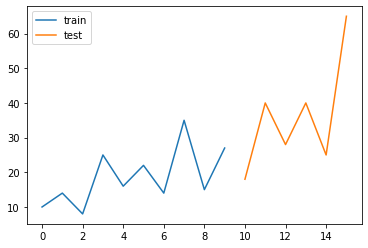

In [21]:
# plot the splits as train and test
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.legend(loc='best')
plt.show()


In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['y']), seasonal_periods=4, trend='add', seasonal='mul')
fit1 = model.fit(smoothing_level=0.0426, smoothing_slope=0.355, smoothing_seasonal=0.161, optimized=False)
y_hat['TES_add_mul'] = fit1.forecast(len(test))
y_hat


,qtr,t,y,TES_add_mul
10,12 Q3,11,18,16.900865
11,12 Q4,12,40,52.601413
12,13 Q1,13,28,22.792009
13,13 Q2,14,40,33.721065
14,13 Q3,15,25,19.987626
15,13 Q4,16,65,61.788988


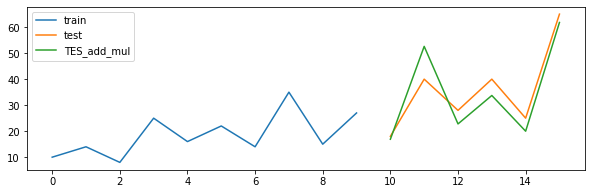

In [24]:
plt.figure(figsize=(10,3))
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.plot(y_hat['TES_add_mul'], label='TES_add_mul')
plt.legend(loc='best')
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rmse=sqrt(mean_squared_error(test.y, y_hat['TES_add_mul']))
print(rmse)

6.607904216572736


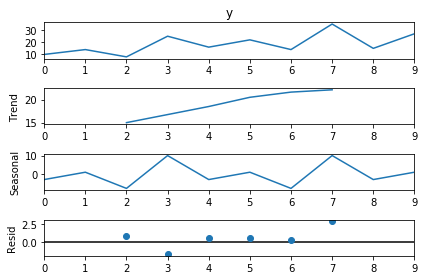

In [26]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.y, model='add', period=4).plot()
#result = sm.tsa.stattools.adfuller(Train.count)
plt.show()

In [27]:
# additive model
# corresponds to real-statistics worksheet "Holt Winters 5"
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['y']), seasonal_periods=4, trend='add', seasonal='add')
fit1 = model.fit(smoothing_level=0.015532, smoothing_slope=1, smoothing_seasonal=0.23088, optimized=False)
y_hat['TES_add'] = fit1.forecast(len(test))
y_hat
rmse=sqrt(mean_squared_error(test.y, y_hat['TES_add']))
print(rmse)


8.339781739486002


In [28]:
model.initial_values()
fit1 = model.fit(smoothing_level=0.015532, smoothing_slope=1, smoothing_seasonal=0.23088, optimized=False, initial_level=14.25, initial_slope=1.875)


In [30]:
model.initial_values()

(14.25, 1.875, [-4.25, -0.25, -6.25, 10.75])

## TES add/mul

In [31]:
import numpy as np
from pandas import read_csv
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)
from sklearn.metrics import mean_squared_error 
from math import sqrt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [32]:
#read and call the data
raw=pd.read_csv(r'D:\Stu\PGP Data Science\Term 2\TF\seriesseasonal.csv')
raw

,qtr,t,y
0,10 Q1,1,10
1,10 Q2,2,14
2,10 Q3,3,8
3,10 Q4,4,25
4,11 Q1,5,16
5,11 Q2,6,22
6,11 Q3,7,14
7,11 Q4,8,35
8,12 Q1,9,15
9,12 Q2,10,27


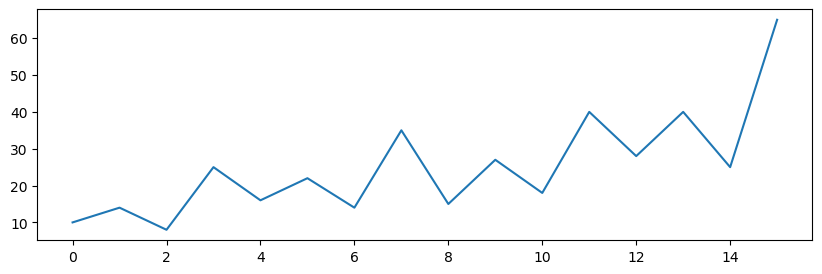

In [34]:
# plot the full series
plt.figure(figsize=(10,3))
plt.plot(raw['y'], label='raw')
plt.show()


In [35]:
# Using ExponentialSmoothing
# this is based on Real Statistics worksheet "Holt-Winters"

# we are building a model [L + T]* S template and passing 4 as length of season cycle
model = ExponentialSmoothing(np.asarray(raw['y']), seasonal_periods=4, trend='add', seasonal='mul')

In [36]:
# fit a model giving these inputs. the strange numbers are a result of optimization.
fit1 = model.fit(smoothing_level=0.2, smoothing_slope=0.2, smoothing_seasonal=0.2, optimized=False)

In [37]:
# how to get info about the model, fitted values
fit1.sse # SSE on training data
fit1.level # level values fitted
fit1.slope # trend values fitted
fit1.season # season value fitted
fit1.fittedvalues # fitted values
fit1.fcastvalues # one time step ahead forecast
fit1.fittedfcast # fitted and one time step ahead forecast
fit1.summary() # model parameters, e.g. alpha, beta etc used or optim values

Dep. Variable:,endog,No. Observations:,16
Model:,ExponentialSmoothing,SSE,329.283
Optimized:,False,AIC,64.389
Trend:,Additive,BIC,70.570
Seasonal:,Multiplicative,AICC,108.389
Seasonal Periods:,4,Date:,"Sun, 10 Jan 2021"
Box-Cox:,False,Time:,16:54:37
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2000000,alpha,False
smoothing_slope,0.2000000,beta,False


In [39]:
# let us reconcile the SSE output.
# this calculates RMSE comparing original data against fitted values
rmse=sqrt(mean_squared_error(raw['y'], fit1.fittedvalues))
print(rmse)
# to compare with SSE, first we need to divide by 16 and take sqrt
np.sqrt(1/16 * fit1.sse)

4.536541477616766


4.536541477616766

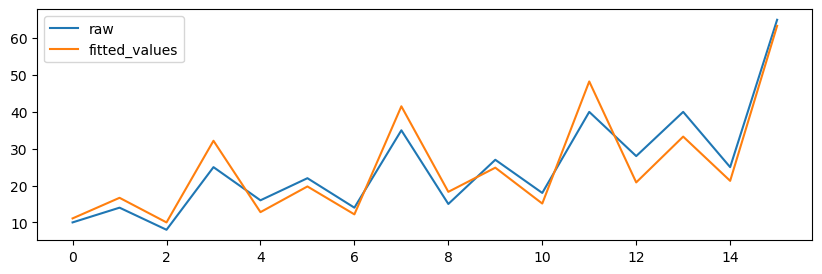

In [41]:
# lets see how the original data and fitted values are visually
plt.figure(figsize=(10,3))
plt.plot(raw['y'], label='raw')
plt.plot(fit1.fittedvalues, label='fitted_values')
plt.legend(loc='best')
plt.show()

In [42]:
# let us try splitting as train and test and try to forecast the test time periods

# split data training and test, create a dataframe with copy of test
train = raw.iloc[0:5]
test = raw.iloc[5:]
y_hat =test.copy() # copy to a dataframe so we can add columns later on

In [43]:
# fit model on just training data
model = ExponentialSmoothing(np.asarray(train['y']), seasonal_periods=4, trend='add', seasonal='mul')
fit1 = model.fit(smoothing_level=0.2, smoothing_slope=0.2, smoothing_seasonal=0.2, optimized=False)

In [44]:
# forecast for as many time periods as in test data
y_hat['TES_add_mul'] = fit1.forecast(len(test))

In [45]:
# see what is in this dataframe
y_hat

,qtr,t,y,TES_add_mul
5,11 Q2,6,22,17.185955
6,11 Q3,7,14,10.135578
7,11 Q4,8,35,32.692075
8,12 Q1,9,15,13.643492
9,12 Q2,10,27,19.619432
10,12 Q3,11,18,11.521677
11,12 Q4,12,40,37.015106
12,13 Q1,13,28,15.389903
13,13 Q2,14,40,22.052909
14,13 Q3,15,25,12.907776


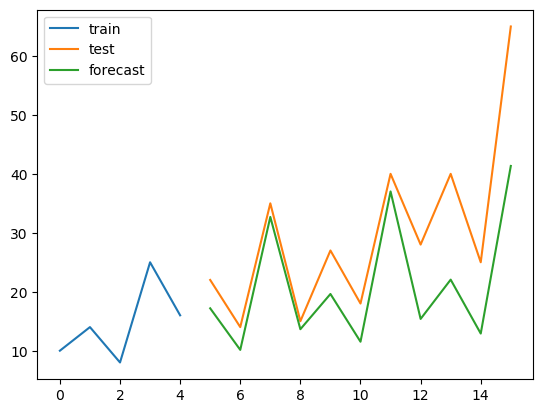

In [46]:
# plot the splits as train, test and forecasted values
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.plot(y_hat['TES_add_mul'], label='forecast')
plt.legend(loc='best')
plt.show()

In [47]:
# how well did the model perform against test?
rmse=sqrt(mean_squared_error(test.y, y_hat['TES_add_mul']))
print(rmse)

11.028247840258535


In [48]:
# optimized version
# this combination is probably the best for reducing MSE
fitx = model.fit(smoothing_level=0.0426, smoothing_slope=0.355, smoothing_seasonal=0.161, optimized=False, initial_level=14.25, initial_slope=1.875, use_brute=False)
y_hat['TES_fitx'] = fitx.forecast(len(test))
rmse=sqrt(mean_squared_error(test.y, y_hat['TES_fitx']))
print(rmse)
fitx.fittedvalues
fitx.forecast(len(test))
fitx.summary()

6.424943413800467


Dep. Variable:,endog,No. Observations:,5
Model:,ExponentialSmoothing,SSE,164.559
Optimized:,False,AIC,33.469
Trend:,Additive,BIC,30.345
Seasonal:,Multiplicative,AICC,inf
Seasonal Periods:,4,Date:,"Sun, 10 Jan 2021"
Box-Cox:,False,Time:,16:57:53
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0426000,alpha,False
smoothing_slope,0.3550000,beta,False


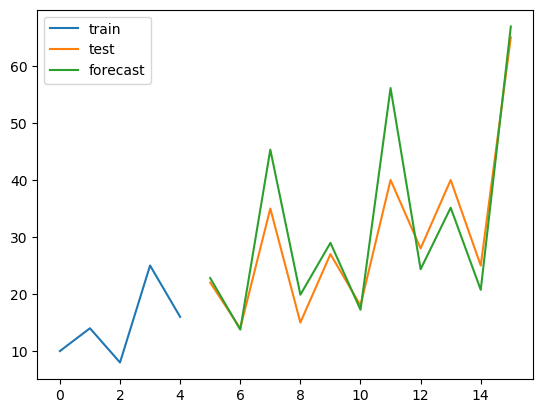

In [49]:
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.plot(y_hat['TES_fitx'], label='forecast')
plt.legend(loc='best')
plt.show()

In [50]:
# reconciling [L + T] * S
df = pd.DataFrame({'level':fit1.level, 'slope': fit1.slope, 'season':fit1.season,'fittedvalues':fit1.fittedvalues})
df

,level,slope,season,fittedvalues
0,13.350000,0.420000,0.764222,10.336538
1,13.616000,0.389200,1.064879,14.829231
2,13.804160,0.348992,0.606551,8.618585
3,13.922522,0.302866,1.891740,27.217600
4,15.567576,0.571304,0.836327,10.871352


C:\Users\Nipun\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


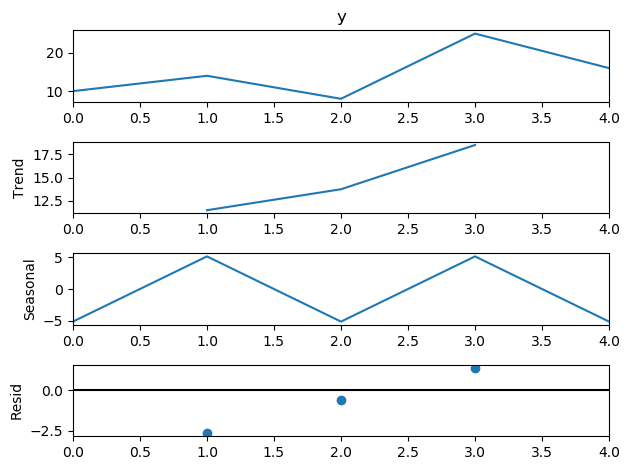

In [51]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.y, model='add', freq=2).plot()
#result = sm.tsa.stattools.adfuller(Train.count)
plt.show()